# EDA

In [1]:
import pandas as pd
import numpy as np
from os.path import dirname, abspath
import matplotlib
from matplotlib import pylab as plt


In [2]:
d = dirname(dirname(abspath("EDA.ipynb")))

df = pd.read_csv(d + '/../data/bank-additional/bank-additional-full.csv', sep = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#df.columns

numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'poutcome']

label = 'y'

categories = ['no', 'yes']

if len(df.columns) == len(numeric_cols) + len(categorical_cols) + 1:
    print('cols checks: pass')
else: print('cols checks: fail')
    

cols checks: pass


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Text(0.5, 0, 'y')

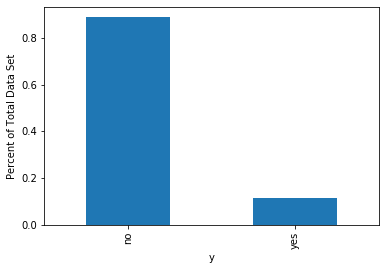

In [5]:
#df.columns

pd.value_counts(df[label],normalize=True).plot.bar() 
plt.ylabel('Percent of Total Data Set')
plt.xlabel(label)


*Note: unbalanced data set*

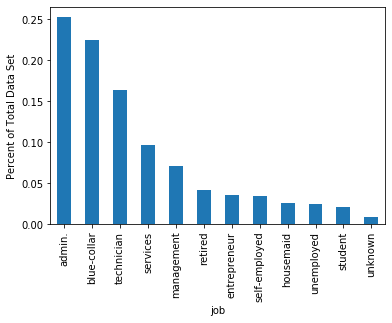

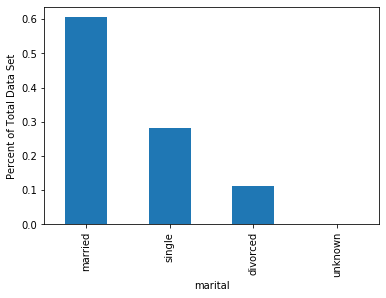

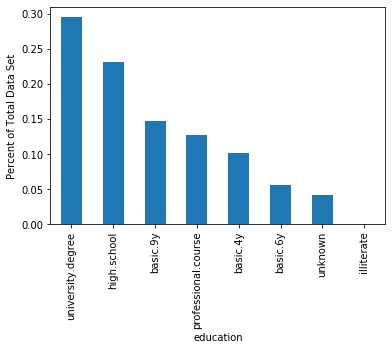

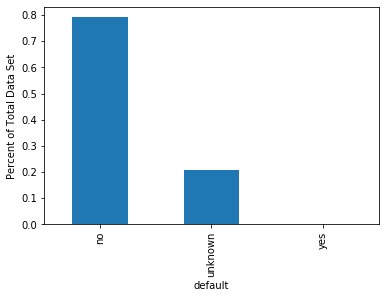

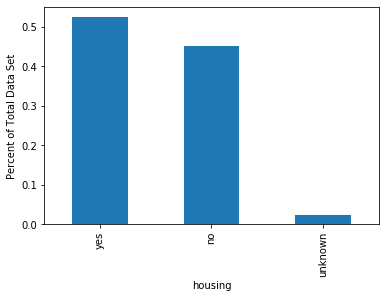

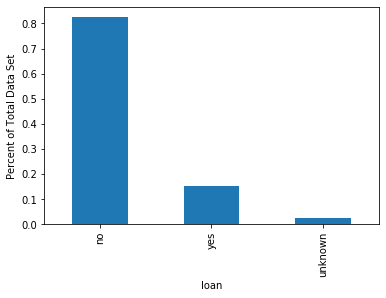

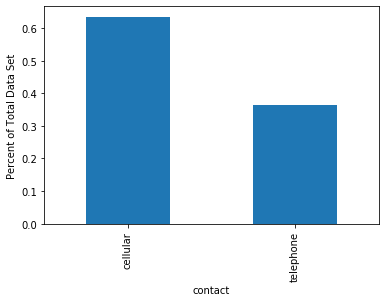

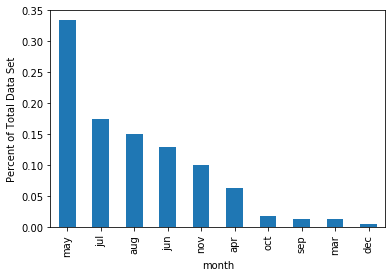

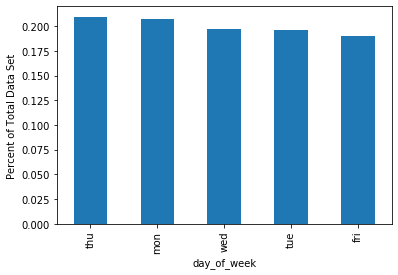

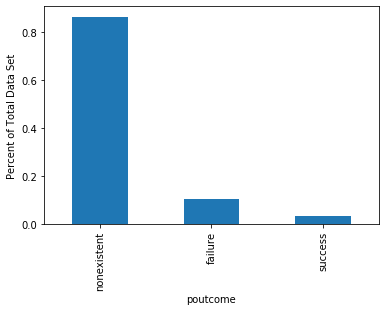

In [7]:

for col in categorical_cols:
    pd.value_counts(df[col],normalize=True).plot.bar()
    plt.ylabel('Percent of Total Data Set')
    plt.xlabel(f'{col}')
    plt.show()


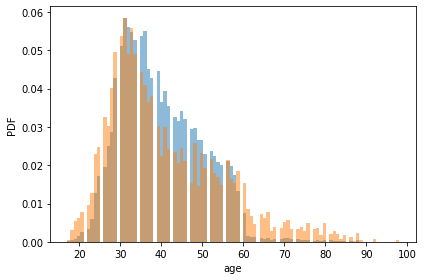

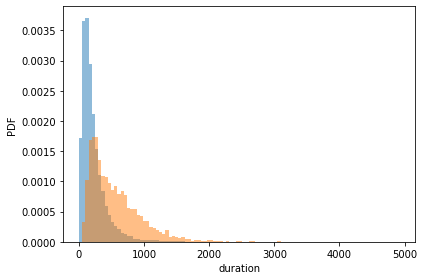

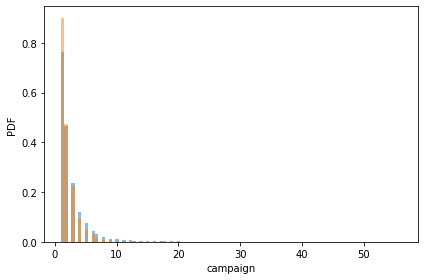

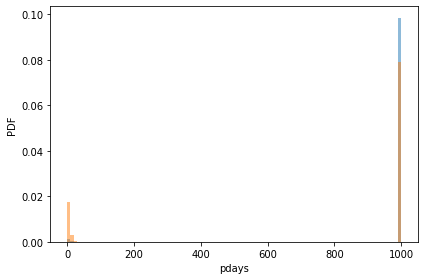

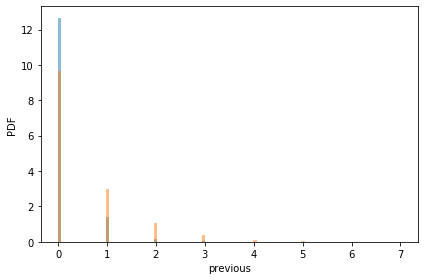

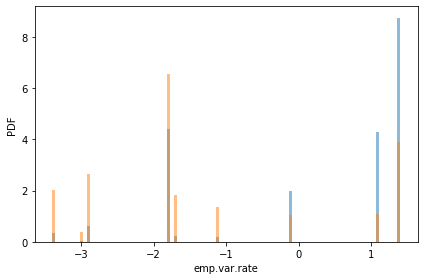

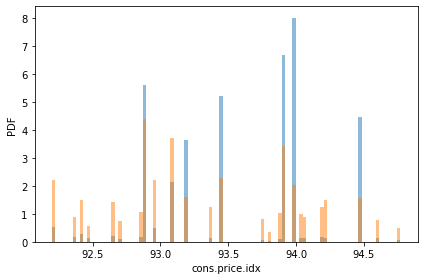

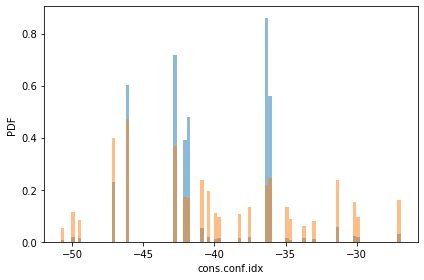

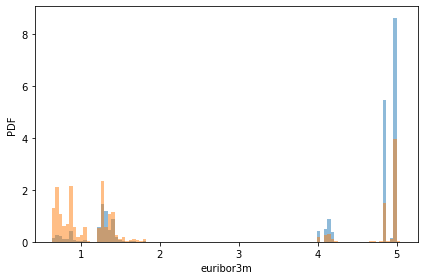

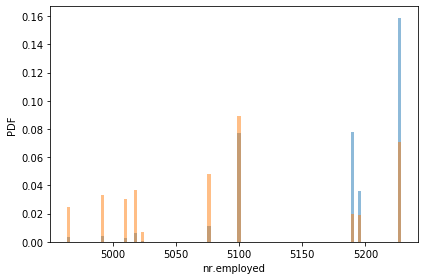

In [6]:

for col in numeric_cols:
    bin_range = (df[col].min(),df[col].max())
    for c in categories:
        plt.hist(df[df[label]==c][col], alpha=0.5,
                label=c,bins=100,density=True, range=bin_range)
    plt.ylabel('PDF')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()